# Lab: Pokémon Data Classification

## Objective
This notebook demonstrates how to classify Pokémon as legendary or not using two machine learning models:
- Logistic Regression
- Multi-Layer Perceptron (MLP)

We will compare the performance of both models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

## Step 1: Load and Explore the Dataset

In [136]:
# Your import 
import pandas as pd

# Load the Pokémon dataset
pokemon_data =  pd.read_csv('pokemon.csv')

# Display the first few rows
pokemon_data.head(5)

,name,deck_no,attack,defense,sp_attack,sp_defense,speed,capture_rt,total_bs,type,gen,legendary
0,Bulbasaur,1,49,49,65,65,45,45,318,grass,1,0
1,Ivysaur,2,62,63,80,80,60,45,405,grass,1,0
2,Venusaur,3,100,123,122,120,80,45,625,grass,1,0
3,Charmander,4,52,43,60,50,65,45,309,fire,1,0
4,Charmeleon,5,64,58,80,65,80,45,405,fire,1,0


## Step 2: Data Preprocessing
### 2.1 Feature Engineering

### <span style="color:red">Please create a derived feature: sp_attack_to_sp_defense_ratio, Target is Legendary</span>. 

In [139]:
# Create a derived feature: sp_attack_to_sp_defense_ratio
pokemon_data['sp_attack_to_sp_defense_ratio'] = pokemon_data['sp_attack'] / pokemon_data['sp_defense']

# your code

# Select all features + derived  
# target: Legendary 
# Your code
features = ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'total_bs',
            'capture_rt', 'sp_attack_to_sp_defense_ratio', 'type']

target = 'legendary'

X = pokemon_data[features] 
y = pokemon_data[target] 

### 2.2 Data Transformation Using ColumnTransformer

In [142]:
# Your import 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, Normalizer, MaxAbsScaler

# Categorical and numerical columns
# your code
categorical_features = ['type']
numeric_features = [col for col in features if col not in categorical_features]

# Preprocessing pipeline
# please choose one suitable method as your scaling method
# please use OneHot as your Encoder
# Your code

numeric_transformer =  MaxAbsScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', MaxAbsScaler(),
                                 ['attack', 'defense', 'sp_attack',
                                  'sp_defense', 'speed', 'total_bs',
                                  'capture_rt',
                                  'sp_attack_to_sp_defense_ratio']),
                                ('cat', OneHotEncoder(), ['type'])])

### Prepare the training data

In [145]:
from sklearn.model_selection import train_test_split

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Train-test split
# Step 1: First train-test split to create training and temporary sets
# X_transformed: Preprocessed feature data
# y: Target labels
# test_size=0.3: Reserve 30% of the data for validation and test sets
# random_state=42: Ensures reproducibility of the splits
# stratify=y: Maintains the class distribution in the split

#Your code
X_train, X_temp, y_train, y_temp = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42, stratify=y
)


In [147]:
# Your import 

# Please use train_test_split to prepare your data

# Your code
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
#Print your X_train and X_test
X_train[:2], X_test[:2]

(array([[0.35135135, 0.2826087 , 0.20618557, 0.17391304, 0.08333333,
         0.40384615, 0.74509804, 0.27007299, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        ],
        [0.45405405, 0.30434783, 0.33505155, 0.30434783, 0.28333333,
         0.52564103, 0.17647059, 0.25078206, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ]]),
 array([[0.51351351, 0.36956522, 0.56701031, 0.41304348, 0.43888889,
         0.68589744, 0.17647059, 0.3127161 , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 

## Step 3: Logistic Regression

In [150]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

# Please build your Logistic Regression model
logistic_reg_model = LogisticRegression(random_state=42, max_iter=1000)



# Train Logistic Regression
logistic_reg_model.fit(X_train, y_train)




# Please use AUC and accuracy score to evaluate your model
# By trying different methods, your accuracy can reach over 90%.
y_val_pred_logistic = logistic_reg_model.predict(X_val)

auc_val_logistic = roc_auc_score(y_val, logistic_reg_model.predict_proba(X_val)[:, 1])

accuracy_score_logistic = accuracy_score(y_val, y_val_pred_logistic)





print("Max + Logistic Regression - Validation Performance:")
print(classification_report(y_val, y_val_pred_logistic))
print(f"Validation AUC: {auc_val_logistic:.4f}")
print(f"Validation accuracy: {accuracy_score_logistic:.4f}")

Max + Logistic Regression - Validation Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       110
           1       0.83      0.50      0.62        10

    accuracy                           0.95       120
   macro avg       0.89      0.75      0.80       120
weighted avg       0.95      0.95      0.94       120

Validation AUC: 0.9855
Validation accuracy: 0.9500


## Step 4: Multi-Layer Perceptron (MLP)

In [153]:
from sklearn.neural_network import MLPClassifier

# Please build your Multi-Layer Perceptron model

# Hidden layer: 8 weights and 4 biases, activation: relu, iteration : 500
# Your code
mlp_model = MLPClassifier(hidden_layer_sizes=(8, 4), activation='relu', max_iter=500, random_state=42)

# Please use AUC and accuracy score to evalue your model
# By trying different methods, your accuracy can reach over 90%.
# Your code

# Train MLP Classifier
mlp_model.fit(X_train, y_train)

y_val_pred_mlp = mlp_model.predict(X_val)

# Evaluate MLP Classifier
auc_val_mlp = roc_auc_score(y_val, mlp_model.predict_proba(X_val)[:, 1])

accuracy_score_mlp = accuracy_score(y_val, y_val_pred_mlp)


print("Max + MLP Classifier - Validation Performance:")
print(classification_report(y_val, y_val_pred_mlp))
print(f"Validation AUC: {auc_val_mlp:.4f}")
print(f"Validation accuracy: {accuracy_score_mlp:.4f}")

Max + MLP Classifier - Validation Performance:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.82      0.90      0.86        10

    accuracy                           0.97       120
   macro avg       0.90      0.94      0.92       120
weighted avg       0.98      0.97      0.98       120

Validation AUC: 0.9873
Validation accuracy: 0.9750


C:\Users\Max\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Step 5: Comparison of Models - Training Loss Curve

### Manually record the loss of logistic regression

In [167]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
# Please record your loss of logistic regression with 500 iterations
# Your code
logistic_model = LogisticRegression(
    max_iter=1,  # Run one iteration at a time
    solver='saga',  # The saga solver supports recording loss values during optimization
    random_state=42,
    warm_start=True  # Continue training from the last state, which allow manually record the loss at each iteration
)

# Initialize the model with warm_start to fit incrementally


# To store the loss values
loss_curve = []

# Train the model incrementally
# Your code
for i in range(500):
    logistic_model.fit(X_train, y_train)  # Incremental training
    y_pred_proba = logistic_model.predict_proba(X_train)
    loss = log_loss(y_train, y_pred_proba)
    loss_curve.append(loss)



C:\Users\Max\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Max\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Max\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Max\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Max\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Max\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached 

C:\Users\Max\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


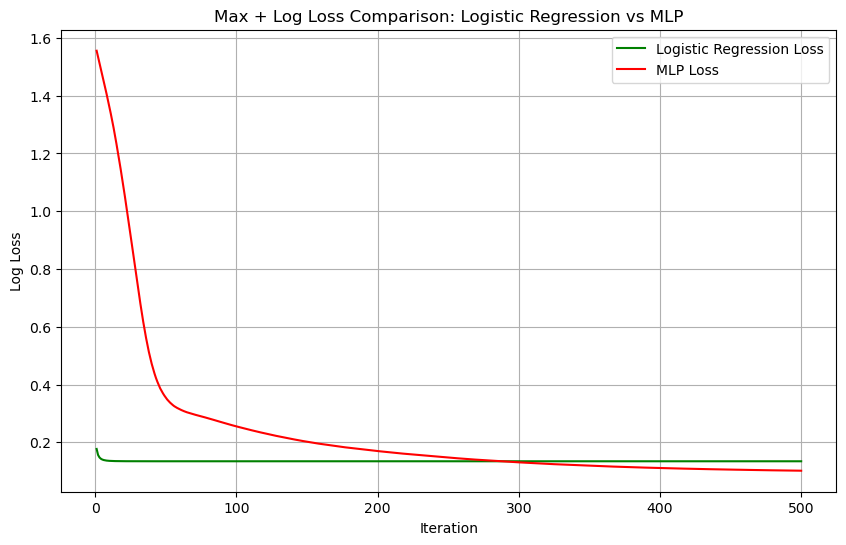

In [168]:
# Extract loss during MLP training
# Your code
mlp_model = MLPClassifier(hidden_layer_sizes=(8, 4), activation='relu', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
loss_curve_mlp = mlp_model.loss_curve_


# Plot the loss difference during MLP training and Logistic
# please set color of Logistic as green, set MLP as red.
# Your code
# Plot the loss difference during MLP training and Logistic Regression
plt.figure(figsize=(10, 6))

# Logistic Regression loss curve (in green)
plt.plot(range(1, 501), loss_curve, label='Logistic Regression Loss', color='green')

# MLP loss curve (in red)
plt.plot(range(1, len(loss_curve_mlp) + 1), loss_curve_mlp, label='MLP Loss', color='red')

plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Max + Log Loss Comparison: Logistic Regression vs MLP')
plt.legend()
plt.grid(True)
plt.show()


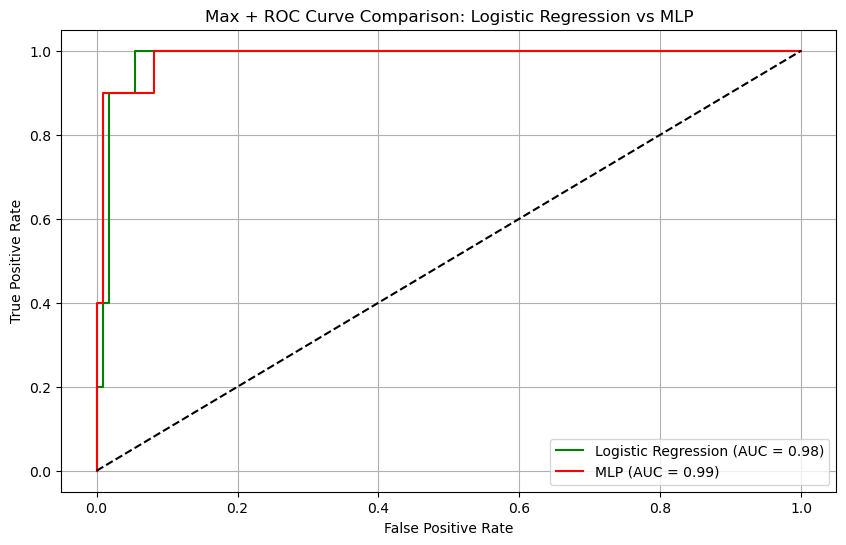

In [171]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Plot ROC Curve Comparison


# Plot ROC curves
# Your code 
 
# please set color of Logistic as green, set MLP as red.
# Your code 

# Logistic Regression probabilities (for the positive class)
y_prob_logistic = logistic_model.predict_proba(X_val)[:, 1]  # Only the probability for the positive class

# MLP probabilities (for the positive class)
y_prob_mlp = mlp_model.predict_proba(X_val)[:, 1]  # Only the probability for the positive class

# Compute ROC curve and AUC for Logistic Regression
fpr_logistic, tpr_logistic, _ = roc_curve(y_val, y_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Compute ROC curve and AUC for MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_val, y_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(10, 6))

# Plot Logistic Regression ROC curve (green)
plt.plot(fpr_logistic, tpr_logistic, color='green', label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')

# Plot MLP ROC curve (red)
plt.plot(fpr_mlp, tpr_mlp, color='red', label=f'MLP (AUC = {roc_auc_mlp:.2f})')

# Plot diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Max + ROC Curve Comparison: Logistic Regression vs MLP')

# Add legend
plt.legend(loc='lower right')

# Show plot
plt.grid(True)
plt.show()

In [ ]:
# Your idea:
# You can use these curves to evaluate which model is better based on AUC. 
# Typically, higher AUC indicates better performance.


## Step 6: Visualization of Predictions and Confusion Matrices

### 6.1 Actual vs Predicted Results

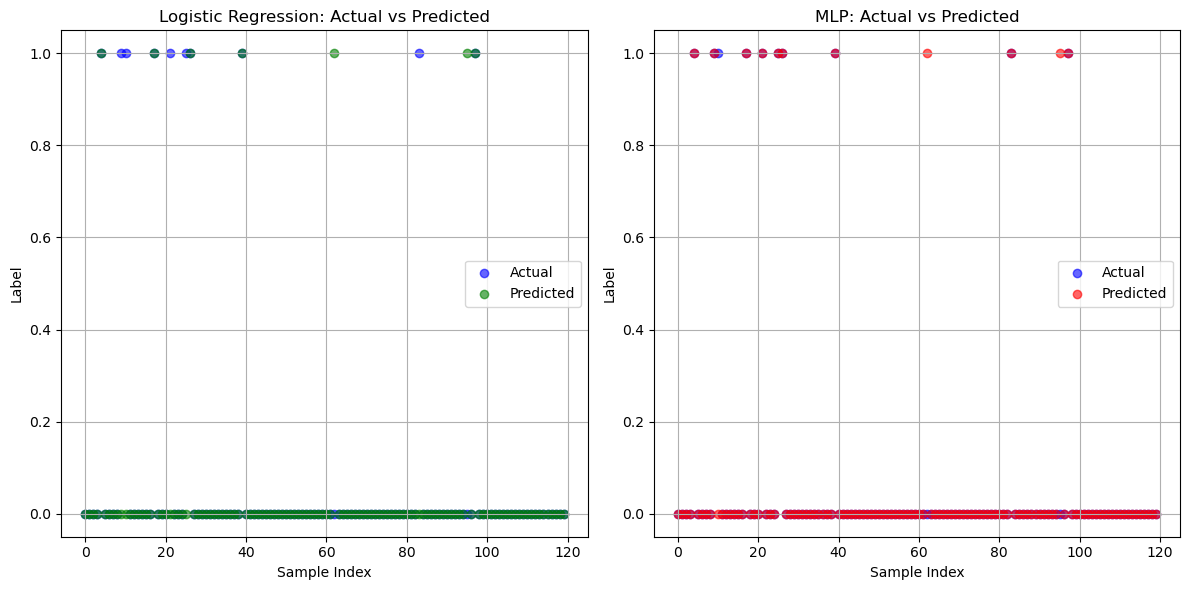

In [173]:
# Please plot the Actual data and Predicted for Logistic and MLP model
# Your code
# Get the predicted values from both models (for the validation set)
y_pred_logistic = logistic_model.predict(X_val)
y_pred_mlp = mlp_model.predict(X_val)

# Plot Actual vs Predicted values for Logistic Regression
plt.figure(figsize=(12, 6))

# Logistic Regression Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_val)), y_val, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_logistic)), y_pred_logistic, color='green', label='Predicted', alpha=0.6)
plt.title('Logistic Regression: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.grid(True)

# MLP Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_val)), y_val, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_mlp)), y_pred_mlp, color='red', label='Predicted', alpha=0.6)
plt.title('MLP: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

### Confusion Matrices

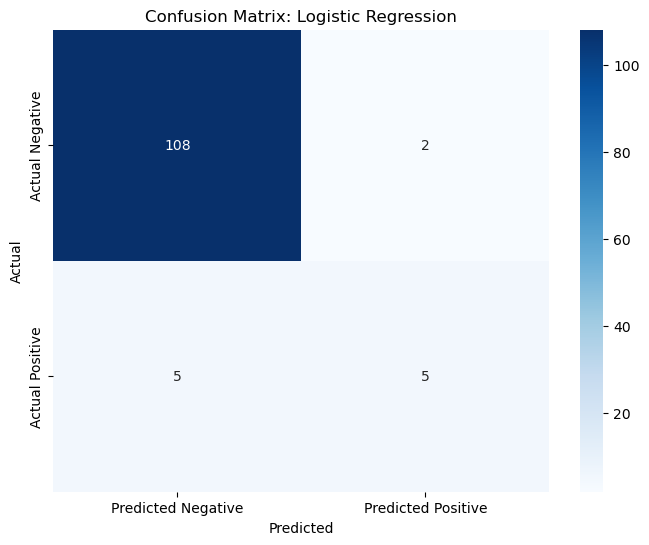

In [176]:
# plot Logistic Regression
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Logistic Regression
y_pred_logistic = logistic_model.predict(X_val)
# your code
# Compute the confusion matrix
cm_logistic = confusion_matrix(y_val, y_pred_logistic)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

# Add labels and title
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show plot
plt.show()

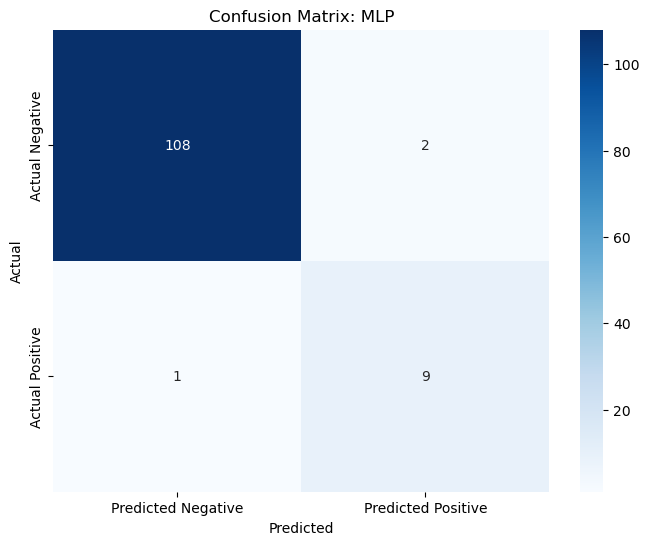

In [178]:
# plot MLP
# Your code
# Get predictions from MLP
y_pred_mlp = mlp_model.predict(X_val)

# Compute the confusion matrix for MLP
cm_mlp = confusion_matrix(y_val, y_pred_mlp)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

# Add labels and title
plt.title('Confusion Matrix: MLP')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show plot
plt.show()


## Conclusion

In [181]:
# Please compare the difference and common between Logistic results and MLP results
# Your idea :
# The confusion matrices reveal that while both Logistic Regression and MLP models excel 
# at identifying true negatives, the MLP demonstrates superior performance in classifying positive instances.
# Specifically, the MLP significantly reduces false negatives (from 5 to 1) and increases true positives (from 5 to 9) 
# compared to the Logistic Regression model.This suggests the MLP's ability to learn complex, non-linear relationships within the data 
# leads to a more accurate classification of positive cases. Consequently, for this dataset, the MLP model offers a clear advantage 
# over Logistic Regression.